## Support Vector Machine

## Forest Fires Data
### Classify the Size_Categorie using SVM

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

## 2. Import Data

In [2]:
forestfires_data=pd.read_csv('forestfires.csv')
forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## 3. Data Understanding

**Data Description:**

- month	month of the year: 'jan' to 'dec'
- day	day of the week: 'mon' to 'sun'
- FFMC	FFMC index from the FWI system: 18.7 to 96.20
- DMC	DMC index from the FWI system: 1.1 to 291.3
- DC	DC index from the FWI system: 7.9 to 860.6
- ISI	ISI index from the FWI system: 0.0 to 56.10
- temp	temperature in Celsius degrees: 2.2 to 33.30
- RH	relative humidity in %: 15.0 to 100
- wind	wind speed in km/h: 0.40 to 9.40
- rain	outside rain in mm/m2 : 0.0 to 6.4
- Size_Categorie 	the burned area of the forest ( Small , Large)

### 3.1 Initial Analysis

In [3]:
forestfires_data.shape

(517, 31)

In [4]:
forestfires_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forestfires_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
forestfires_data.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


## 4. Data Pre-processing

In [7]:
forestfires_data=forestfires_data.drop(['month','day'],axis=1)
forestfires_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
#Normalizing the Data
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
forestfires_data.iloc[:,:-1]=norm_fun(forestfires_data.iloc[:,:-1])
forestfires_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,small
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,small
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,small
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,small
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,small


In [10]:
forestfires_data['size_category']=forestfires_data['size_category'].apply(lambda x: 1 if x == 'large' else 0)
forestfires_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## 5. Model Building

In [11]:
X=forestfires_data.iloc[:,:-1]
y=forestfires_data[['size_category']]

In [12]:
X.shape, y.shape

((517, 28), (517, 1))

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=10, shuffle=True, stratify=y)

In [14]:
X_train.shape, y_train.shape

((387, 28), (387, 1))

In [15]:
X_test.shape, y_test.shape

((130, 28), (130, 1))

## 6. Model Training || 7. Model Evaluation

In [16]:
svm_classifier=SVC()

#### 1. Linear Kernel

In [17]:
%%time
grid_search=GridSearchCV(estimator=svm_classifier, param_grid={'C':[0.001, 0.01, 0.1, 1, 10],  
                                                               'kernel':['linear']})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'kernel': 'linear'}
0.7659447348767737
Wall time: 844 ms


#### 2. RBF Kernel

In [18]:
%%time
grid_search=GridSearchCV(estimator=svm_classifier, param_grid={'C':[0.001, 0.01, 0.1, 1, 10],  
                                                          'gamma':[0.001,0.01,0.1,1,10],
                                                          'kernel':['rbf']})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.7330843913368186
Wall time: 3.01 s


#### 3. Ploynomial Kernel

In [19]:
%%time
grid_search=GridSearchCV(estimator=svm_classifier, param_grid={'C':[0.001, 0.01, 0.1, 1, 10],  
                                                          'gamma':[0.001,0.01,0.1,1,10],
                                                          'kernel':['poly']})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 10, 'kernel': 'poly'}
0.8199589245705751
Wall time: 3.37 s


#### 4. Sigmoid Kernel

In [20]:
%%time
grid_search=GridSearchCV(estimator=svm_classifier, param_grid={'C':[0.001, 0.01, 0.1, 1, 10],  
                                                          'gamma':[0.001,0.01,0.1,1,10],
                                                          'kernel':['sigmoid']})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.7350261389096341
Wall time: 2.42 s


### So we came to know that Polynomial Kernel has the Best Accuracy... So let us train the data with Polynomial Kernel

In [21]:
svm_classifier=SVC(C=1.0, kernel='poly',degree=3,gamma=10)
svm_classifier.fit(X_train,y_train)

SVC(gamma=10, kernel='poly')

In [22]:
y_pred_train=svm_classifier.predict(X_train)

In [23]:
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))

Accuracy Score: 1.0


In [24]:
print('Classification Report:\n', classification_report(y_train, y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       1.00      1.00      1.00       104

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387



In [25]:
print('Confusion Matrix:\n',confusion_matrix(y_train, y_pred_train))

Confusion Matrix:
 [[283   0]
 [  0 104]]


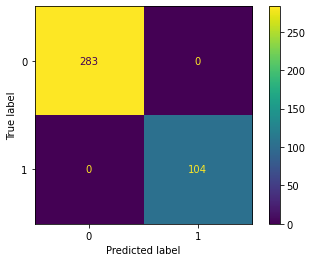

In [26]:
plot_confusion_matrix( estimator=svm_classifier,X=X_train,y_true=y_train)

## 8. Model Testing & Evaluation

In [27]:
y_pred_test=svm_classifier.predict(X_test)

In [28]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.8769230769230769


In [29]:
print('Classification Report:\n', classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        95
           1       0.77      0.77      0.77        35

    accuracy                           0.88       130
   macro avg       0.84      0.84      0.84       130
weighted avg       0.88      0.88      0.88       130



In [30]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[87  8]
 [ 8 27]]


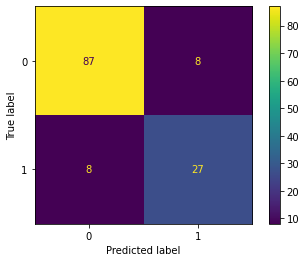

In [31]:
plot_confusion_matrix( estimator=svm_classifier,X=X_test,y_true=y_test)

## ==========================================================================